In [1]:
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

Using TensorFlow backend.


In [2]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [4]:
# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [5]:
# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 7s 111us/step - loss: 0.2257 - acc: 0.9307 - val_loss: 0.1130 - val_acc: 0.9654
Epoch 2/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0863 - acc: 0.9733 - val_loss: 0.1122 - val_acc: 0.9656
Epoch 3/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0572 - acc: 0.9821 - val_loss: 0.0788 - val_acc: 0.9761
Epoch 4/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0399 - acc: 0.9874 - val_loss: 0.0790 - val_acc: 0.9801
Epoch 5/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0297 - acc: 0.9905 - val_loss: 0.0826 - val_acc: 0.9785
Epoch 6/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0232 - acc: 0.9927 - val_loss: 0.0864 - val_acc: 0.9805
Epoch 7/10
60000/600

In [7]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10416394962423646
Test accuracy: 0.9812


In [0]:
from keras import optimizers
sgd=keras.optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False)

In [9]:
# Compile model using above optimizer
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0046 - acc: 0.9986 - val_loss: 0.0920 - val_acc: 0.9834
Epoch 2/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0892 - val_acc: 0.9838
Epoch 3/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0021 - acc: 0.9994 - val_loss: 0.0878 - val_acc: 0.9841
Epoch 4/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0018 - acc: 0.9996 - val_loss: 0.0869 - val_acc: 0.9841
Epoch 5/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0016 - acc: 0.9997 - val_loss: 0.0863 - val_acc: 0.9840
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0014 - acc: 0.9997 - val_loss: 0.0860 - val_acc: 0.9839
Epoch 7/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0013 - acc: 0.9998 - val_loss: 0.0856 - val_acc

In [0]:
from keras import optimizers
rms=keras.optimizers.RMSprop(lr=0.001, rho=0.9)

In [11]:
# Compile model using above optimizer
model.compile(optimizer=rms,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 108us/step - loss: 0.0117 - acc: 0.9962 - val_loss: 0.0965 - val_acc: 0.9813
Epoch 2/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0084 - acc: 0.9973 - val_loss: 0.1021 - val_acc: 0.9824
Epoch 3/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0079 - acc: 0.9977 - val_loss: 0.1195 - val_acc: 0.9802
Epoch 4/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0071 - acc: 0.9979 - val_loss: 0.1328 - val_acc: 0.9798
Epoch 5/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0073 - acc: 0.9980 - val_loss: 0.1195 - val_acc: 0.9825
Epoch 6/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0053 - acc: 0.9986 - val_loss: 0.1376 - val_acc: 0.9799
Epoch 7/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0046 - acc: 0.9984 - val_loss: 0.1240 - 

In [0]:
from keras import optimizers
ada=keras.optimizers.Adagrad(lr=0.01)

In [13]:
# Compile model using above optimizer
model.compile(optimizer=ada,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0370 - acc: 0.9952 - val_loss: 0.1220 - val_acc: 0.9840
Epoch 2/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0014 - acc: 0.9996 - val_loss: 0.1192 - val_acc: 0.9836
Epoch 3/10
60000/60000 [==============================] - 6s 97us/step - loss: 3.9666e-04 - acc: 1.0000 - val_loss: 0.1171 - val_acc: 0.9835
Epoch 4/10
60000/60000 [==============================] - 6s 96us/step - loss: 2.9254e-04 - acc: 1.0000 - val_loss: 0.1168 - val_acc: 0.9836
Epoch 5/10
60000/60000 [==============================] - 6s 96us/step - loss: 2.8609e-04 - acc: 1.0000 - val_loss: 0.1166 - val_acc: 0.9837
Epoch 6/10
60000/60000 [==============================] - 6s 97us/step - loss: 2.8394e-04 - acc: 1.0000 - val_loss: 0.1165 - val_acc: 0.9839
Epoch 7/10
60000/60000 [==============================] - 6s 97us/step - loss: 2.8250e-04 - acc: 1.0000 - val_l

In [0]:
from keras import optimizers
adelta=keras.optimizers.Adadelta(lr=1.0, rho=0.95)

In [15]:
# Compile model using above optimizer
model.compile(optimizer=adelta,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 124us/step - loss: 2.7950e-04 - acc: 1.0000 - val_loss: 0.1159 - val_acc: 0.9840
Epoch 2/10
60000/60000 [==============================] - 7s 119us/step - loss: 2.7764e-04 - acc: 1.0000 - val_loss: 0.1157 - val_acc: 0.9842
Epoch 3/10
60000/60000 [==============================] - 7s 120us/step - loss: 2.7668e-04 - acc: 1.0000 - val_loss: 0.1156 - val_acc: 0.9843
Epoch 4/10
60000/60000 [==============================] - 7s 122us/step - loss: 2.7586e-04 - acc: 1.0000 - val_loss: 0.1156 - val_acc: 0.9843
Epoch 5/10
60000/60000 [==============================] - 7s 119us/step - loss: 2.7522e-04 - acc: 1.0000 - val_loss: 0.1155 - val_acc: 0.9841
Epoch 6/10
60000/60000 [==============================] - 7s 117us/step - loss: 2.7475e-04 - acc: 1.0000 - val_loss: 0.1154 - val_acc: 0.9843
Epoch 7/10
60000/60000 [==============================] - 7s 117us/step - loss: 2.7439e-04 - acc: 

In [0]:
from keras import optimizers
adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [17]:
# Compile model using above optimizer
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0190 - acc: 0.9957 - val_loss: 0.1203 - val_acc: 0.9811
Epoch 2/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0152 - acc: 0.9961 - val_loss: 0.1240 - val_acc: 0.9807
Epoch 3/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0126 - acc: 0.9965 - val_loss: 0.1129 - val_acc: 0.9818
Epoch 4/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.0074 - acc: 0.9977 - val_loss: 0.1202 - val_acc: 0.9796
Epoch 5/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.0127 - acc: 0.9966 - val_loss: 0.1305 - val_acc: 0.9807
Epoch 6/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0126 - acc: 0.9968 - val_loss: 0.1107 - val_acc: 0.9806
Epoch 7/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0095 - acc: 0.9973 - val_loss: 0.1148 - 

In [0]:
from keras import optimizers
nadam=keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999)

In [19]:
# Compile model using above optimizer
model.compile(optimizer=nadam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0371 - acc: 0.9917 - val_loss: 0.1451 - val_acc: 0.9765
Epoch 2/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0272 - acc: 0.9933 - val_loss: 0.1177 - val_acc: 0.9792
Epoch 3/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0207 - acc: 0.9945 - val_loss: 0.1241 - val_acc: 0.9805
Epoch 4/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0223 - acc: 0.9943 - val_loss: 0.1339 - val_acc: 0.9744
Epoch 5/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0211 - acc: 0.9941 - val_loss: 0.1251 - val_acc: 0.9780
Epoch 6/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0221 - acc: 0.9944 - val_loss: 0.1300 - val_acc: 0.9770
Epoch 7/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0167 - acc: 0.9955 - val_loss: 0.1364 - 

In [0]:
from keras import optimizers
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)

In [21]:
# Compile model using above optimizer
model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0027 - acc: 0.9993 - val_loss: 0.1092 - val_acc: 0.9845
Epoch 2/10
60000/60000 [==============================] - 6s 99us/step - loss: 3.7971e-04 - acc: 1.0000 - val_loss: 0.1079 - val_acc: 0.9853
Epoch 3/10
60000/60000 [==============================] - 6s 97us/step - loss: 3.2373e-04 - acc: 1.0000 - val_loss: 0.1082 - val_acc: 0.9852
Epoch 4/10
60000/60000 [==============================] - 6s 100us/step - loss: 3.0513e-04 - acc: 1.0000 - val_loss: 0.1088 - val_acc: 0.9853
Epoch 5/10
60000/60000 [==============================] - 6s 101us/step - loss: 2.9324e-04 - acc: 1.0000 - val_loss: 0.1095 - val_acc: 0.9851
Epoch 6/10
60000/60000 [==============================] - 6s 100us/step - loss: 2.8506e-04 - acc: 1.0000 - val_loss: 0.1104 - val_acc: 0.9854
Epoch 7/10
60000/60000 [==============================] - 6s 99us/step - loss: 2.7946e-04 - acc: 1.0000 

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


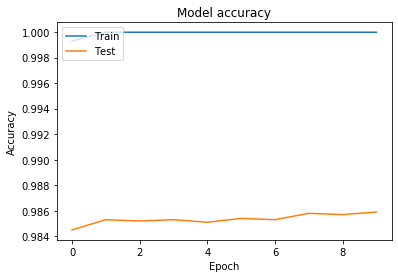

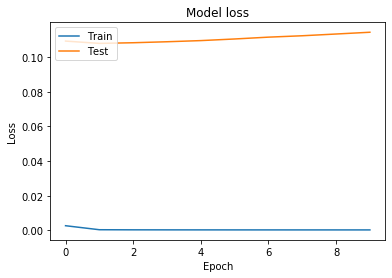

In [23]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

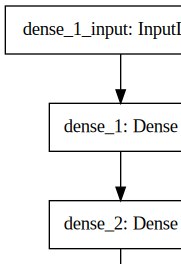

In [24]:
# Output network visualization
SVG(model_to_dot(model).create(prog='dot', format='svg'))